# Supply Chain Analysis


#### Group : 8
#### Members : Edwin, Divya, Himadri, Daegan, Suryansh


Supply chain analysis involves examining each stage of the supply chain, from the acquisition of raw materials or supplies from suppliers to the delivery of final products to customers.

The goal of this analysis is to identify areas within the supply chain that can be optimized or streamlined to enhance the speed and efficiency of product delivery to customers.

## What Are Supply Chain Analytics and Their Different Types?

Supply chain analytics can significantly enhance the efficiency of business operations, leading to substantial cost savings.

 - Descriptive Analytics: This type focuses on understanding past events by analyzing historical data. It provides insights into key performance metrics such as inventory levels, lead times, and delivery performance. By identifying patterns and trends in past supply chain operations, organizations can make informed decisions about future strategies.

 - Diagnostic Analytics: This goes beyond descriptive analytics by identifying the root causes of supply chain issues. By analyzing data from various sources, such as suppliers, logistics providers, and customers, organizations can pinpoint factors contributing to delays, disruptions, or quality issues. This enables them to take corrective actions to prevent similar problems in the future.

 - Predictive Analytics: This uses statistical models and machine learning algorithms to forecast future supply chain events. By analyzing historical data, organizations can identify patterns and trends that help predict demand, inventory levels, and delivery performance. This aids in optimizing supply chain operations, reducing costs, and improving customer satisfaction.

 - Prescriptive Analytics: This takes predictive analytics a step further by offering recommendations on how to optimize supply chain operations. By using optimization algorithms and simulations, prescriptive analytics helps organizations determine the best course of action to enhance supply chain performance, facilitating better decision-making and overall efficiency improvement.

### Import Libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Load the dataset

In [2]:
supply_chain_df = pd.read_csv('supply_chain_data.csv')

In [3]:
supply_chain_df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Replacing the Space between the column names to '_'

In [4]:
supply_chain_df.columns = [s.strip().replace(' ','_') for s in supply_chain_df.columns]

In [5]:
supply_chain_df.head(5)

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Handle missing values (if any)

In [11]:
supply_chain_df.fillna(method='ffill', inplace=True)

## Descriptive Statistics

In [12]:
supply_chain_df.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


    Price: The average price is around $49.46, with a range from $1.70 to $99.17.
    
    Availability: Products are available on average about 48.4% of the time, with a range from 1% to 100%.
    
    Number of products sold: The average number sold is approximately 461 units, with a minimum of 8 and a maximum of 996.
    
    Revenue generated: The average revenue generated is $5776.05, with a range from $1061.62 to $9866.47.
    
    Stock levels: On average, stock levels are about 47.77%, ranging from 0% to 100%.
    
    Lead times: The average lead time is 15.96 days, with a range from 1 day to 30 days.
    
    Order quantities: The average order quantity is 49.22 units, ranging from 1 unit to 96 units.
    
    Shipping times: Average shipping time is 5.75 days, with a range from 1 day to 10 days.
    
    Shipping costs: Average shipping costs are $5.55, ranging from $1.01 to $9.93.
    
    Manufacturing lead time: This is around 14.77 days on average, with a range from 1 day to 30 days.
    
    Defect rates: Average defect rate is 2.28%, ranging from 0.02% to 4.94%.
    
    Costs: The average cost is $529.25, with a range from $103.92 to $997.41.

## Sales by Product Type

    The company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate.

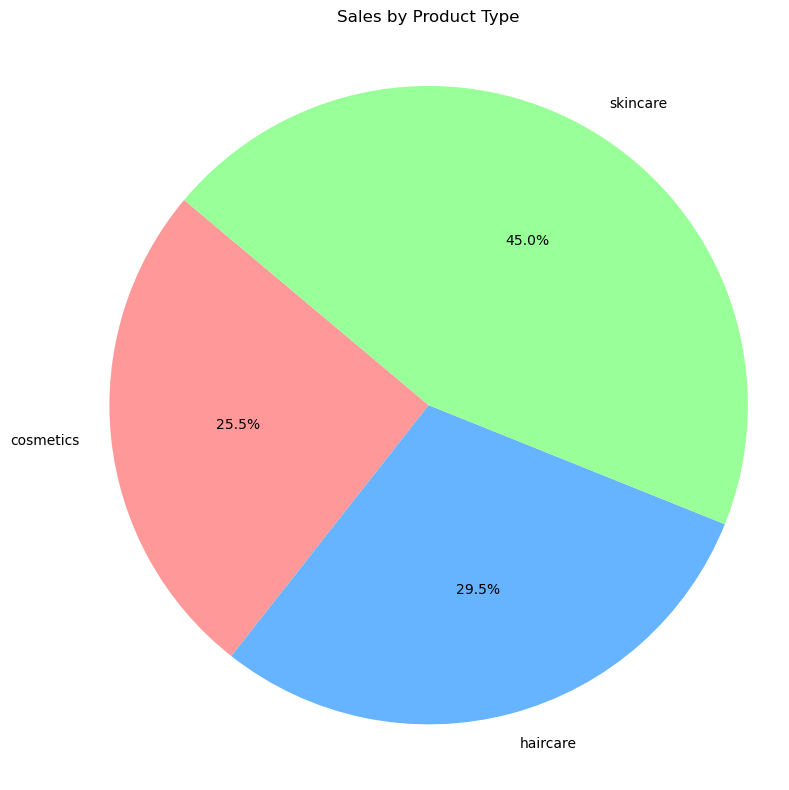

In [20]:
import matplotlib.pyplot as plt

# Grouping the data by Product_type and summing the Number_of_products_sold
sales_data = supply_chain_df.groupby('Product_type')['Number_of_products_sold'].sum()

# Define custom colors for the pie chart
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(sales_data, labels=sales_data.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Sales by Product Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

## Product type

In [22]:
# Assuming you have already calculated avg_lead_time and avg_manufacturing_costs
avg_lead_time = supply_chain_df.groupby('Product_type')['Lead_times'].mean().reset_index()
avg_manufacturing_costs = supply_chain_df.groupby('Product_type')['Manufacturing_costs'].mean().reset_index()

# Merge the two dataframes on 'Product type'
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product_type')
result.rename(columns={'Lead_times': 'Average Lead Time', 'Manufacturing_costs': 'Average Manufacturing Costs'}, inplace=True)

# Display the table
print(result)

  Product_type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          15.384615                    43.052740
1     haircare          15.529412                    48.457993
2     skincare          16.700000                    48.993157


### Cost Distribution by Transportation Mode

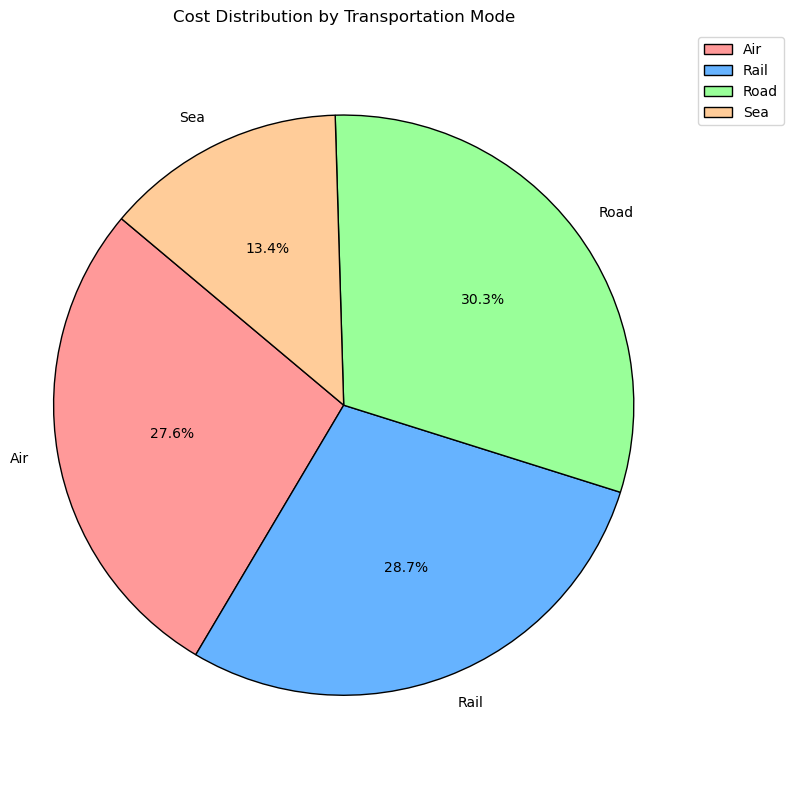

In [25]:
# Grouping the data by Transportation_modes and summing the Costs
costs_by_transportation = supply_chain_df.groupby('Transportation_modes')['Costs'].sum()

# Define custom colors for the pie chart
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(costs_by_transportation, labels=costs_by_transportation.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Cost Distribution by Transportation Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

### So the company spends more on Road and Rail modes of transportation for the transportation of Goods

### Average Defect Rates by Product Type

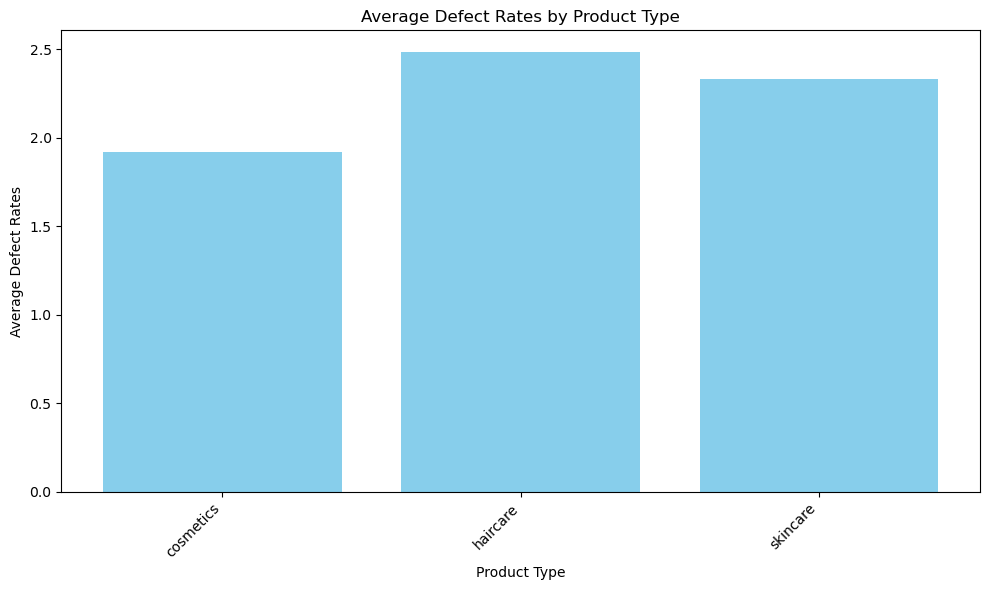

In [26]:
# Grouping the data by Product_type and calculating the mean of Defect rates
defect_rates_by_product = supply_chain_df.groupby('Product_type')['Defect_rates'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(defect_rates_by_product['Product_type'], defect_rates_by_product['Defect_rates'], color='skyblue')
plt.xlabel('Product Type')
plt.ylabel('Average Defect Rates')
plt.title('Average Defect Rates by Product Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### the defect rate of haircare products is higher

## Defect Rates by Transportation Mode

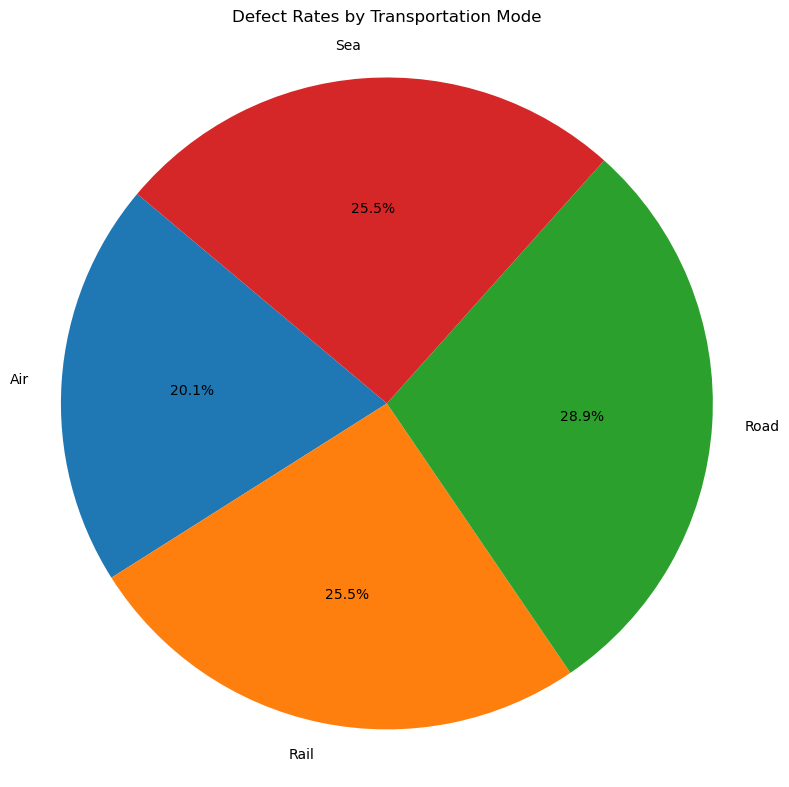

In [28]:
# Create a pivot table with average defect rates by Transportation_modes
pivot_table = supply_chain_df.pivot_table(values='Defect_rates', index='Transportation_modes', aggfunc='mean')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pivot_table['Defect_rates'], labels=pivot_table.index, autopct='%1.1f%%', startangle=140)
plt.title('Defect Rates by Transportation Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate

# Building a classification/prediction model using Neural Networks

In [29]:
# Select predictors and outcome
predictors = ['Price', 'Availability', 'Number_of_products_sold', 'Revenue_generated', 'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times', 'Costs']
outcome = 'Product_type'

In [30]:
# Split the data into training and testing sets
X = supply_chain_df[predictors]
y = supply_chain_df[outcome]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Train the Neural Network Model

In [96]:
# Initialize MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10), activation='relu', solver='adam', random_state=42)

In [97]:
# Fit the model to the training data
clf.fit(X_train_scaled, y_train)

C:\Users\himad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, random_state=42)

# Evaluate the Model

In [98]:
# Make predictions
y_pred = clf.predict(X_test_scaled)

In [99]:
# Evaluate the model
classificationSummary(y_test, y_pred)

Confusion Matrix (Accuracy 0.5000)

       Prediction
Actual 0 1 2
     0 1 1 1
     1 4 5 1
     2 0 3 4


- When  hidden_layer_sizes=(1) :: Accuracy = 0.2000
- When  hidden_layer_sizes=(2) :: Accuracy = 0.3500
- When  hidden_layer_sizes=(3) :: Accuracy = 0.2500
- When  hidden_layer_sizes=(4) :: Accuracy = 0.4500
- When  hidden_layer_sizes=(5) :: Accuracy = 0.4000
- When  hidden_layer_sizes=(6) :: Accuracy = 0.4500
- When  hidden_layer_sizes=(8) :: Accuracy = 0.3500
- When  hidden_layer_sizes=(10) :: Accuracy = 0.5000
- When  hidden_layer_sizes=(20) :: Accuracy = 0.1500
- When  hidden_layer_sizes=(40) :: Accuracy = 0.3000
- When  hidden_layer_sizes=(60) :: Accuracy = 0.3500
- When  hidden_layer_sizes=(80) :: Accuracy = 0.3000
- When  hidden_layer_sizes=(100) :: Accuracy = 0.4500

Based on these results, we can see that the accuracy varies significantly with different values of hidden_layer_sizes. For example, the highest accuracy is achieved when hidden_layer_sizes is set to 10, with an accuracy of 0.5000 (50%). On the other hand, setting hidden_layer_sizes to 20 results in the lowest accuracy of 0.1500 (15%).


# Accuracy Scores by Hidden Layer Sizes

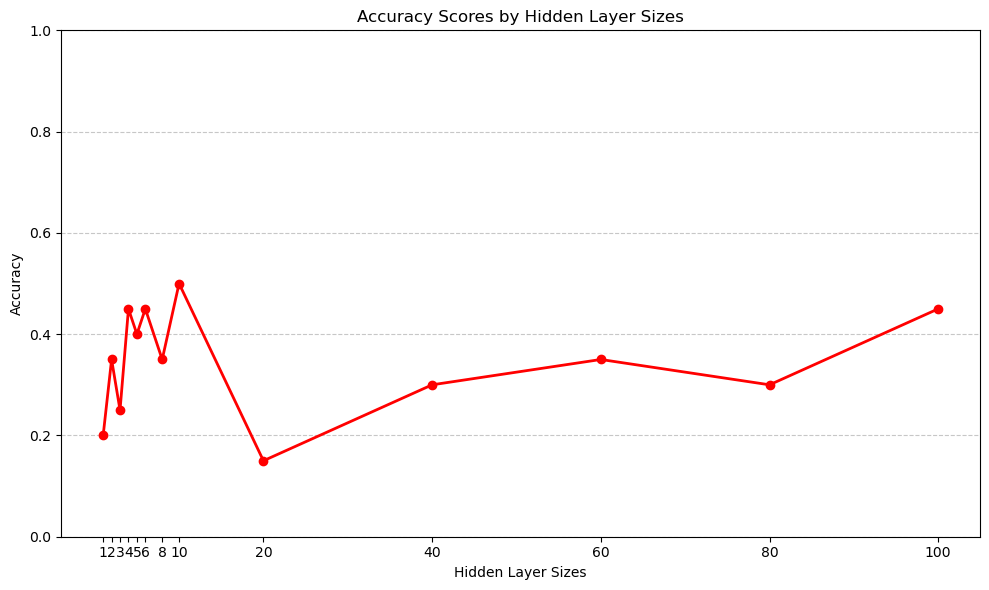

In [105]:
# Define the data
hidden_layer_sizes = [1, 2, 3, 4, 5, 6, 8, 10, 20, 40, 60, 80, 100]
accuracy_scores = [0.2000, 0.3500, 0.2500, 0.4500, 0.4000, 0.4500, 0.3500, 0.5000, 0.1500, 0.3000, 0.3500, 0.3000, 0.4500]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes, accuracy_scores, marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores by Hidden Layer Sizes')
plt.xticks(hidden_layer_sizes)  # Set x-axis ticks to match hidden_layer_sizes values
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (for accuracy percentage)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

## Observations:

- For small hidden layer sizes (1, 2, 3), the accuracy scores are relatively low (around 0.2 to 0.35), suggesting that the neural network may not capture the complexity of the data adequately with fewer hidden layers.
- As the hidden layer size increases (4 to 10), there is an improvement in accuracy, with scores ranging from 0.35 to 0.5. This indicates that adding more hidden layers allows the model to learn more complex patterns in the data, leading to better predictive performance.
- However, beyond a certain point (around hidden layer size 10), the accuracy scores start to fluctuate and may not show significant improvement, as seen with hidden layer sizes 20, 40, 60, 80, and 100.


## Conclusion:

- Based on the analysis, it is evident that the choice of hidden layer size plays a crucial role in determining the accuracy of the neural network model.
- A moderate increase in hidden layer size (from 1 to 10) leads to improved accuracy, indicating that a neural network with a sufficient number of hidden layers can better capture the underlying patterns in the data.
- However, increasing the hidden layer size beyond a certain threshold does not necessarily guarantee a proportional increase in accuracy. It is essential to find a balance between model complexity (hidden layer size) and performance (accuracy) to avoid overfitting and computational overhead.
